# 雷达数据的切片

In [1]:
from __future__ import print_function
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from copy import deepcopy
import multidop
import pyart
import tempfile
import os
import glob
import time


from pycwr.io.auto_io import radar_io 
import numpy as np
import pandas as pd
import xarray as xr
import pyart
grad_data = pyart.io.read_grid('/home/liyuan3970/Data/data/meto_data/radar_typhoon_liqima/grid.nc')



## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



/home/liyuan3970/anaconda3/lib/python3.7/site-packages/yaml/constructor.py:126: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  if not isinstance(key, collections.Hashable):
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/h5py/_hl/base.py:19: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import (Mapping, MutableMapping, KeysView,
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/h5py/_hl/base.py:19: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import (Mapping, MutableMapping, KeysView,
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/h5py/_hl/base.py:19: DeprecationWarning: Using or importing the ABCs from 'collections' instead o

In [2]:
display = pyart.graph.GridMapDisplay(grad_data)


/home/liyuan3970/.local/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:773: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)
/home/liyuan3970/.local/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:820: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)


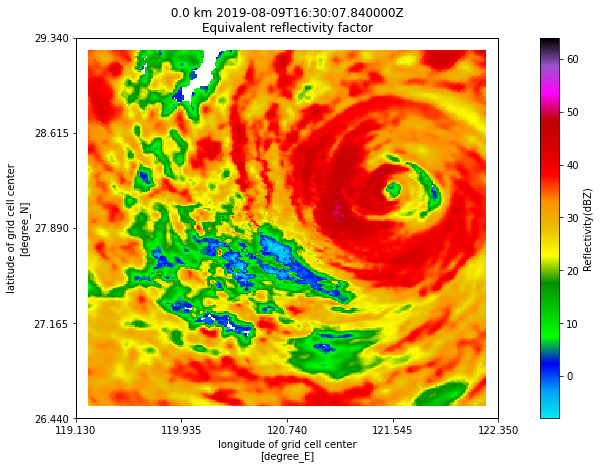

In [3]:
fig = plt.figure(figsize=[15, 7])

# panel sizes
map_panel_axes = [0.05, 0.05, .4, .80]
level = 0
vmin = -8
vmax = 64
# panel 1, basemap, radar reflectivity and NARR overlay
ax1 = fig.add_axes(map_panel_axes)
#display.plot_basemap(lon_lines = np.arange(-104, -93, 2) )
lat_min, lat_max, lon_min, lon_max = display.plot_grid('reflectivity', level=level, vmin=vmin, vmax=vmax,
                 cmap = pyart.graph.cm.NWSRef)

/home/liyuan3970/.local/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:773: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)
/home/liyuan3970/.local/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:820: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)


(<xarray.DataArray 'lat' ()>
 array(26.54283454), <xarray.DataArray 'lat' ()>
 array(29.24034162), <xarray.DataArray 'lon' ()>
 array(119.23218792), <xarray.DataArray 'lon' ()>
 array(122.24781208))

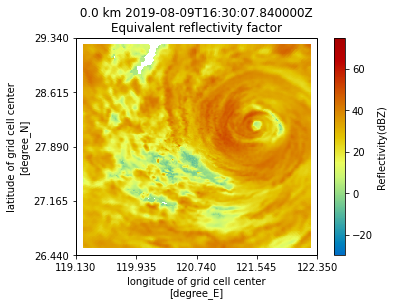

In [6]:
display.plot_grid('reflectivity', level=level)

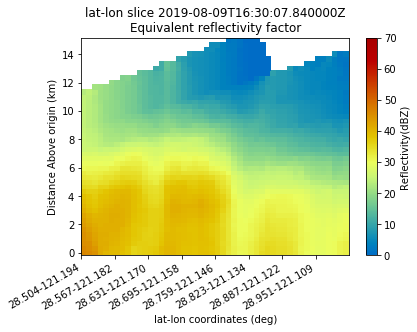

In [9]:
x, z, data = display.plot_latlon_slice("reflectivity", coord1=(121.2, 28.5), coord2=(121.1, 28.0),vmin=0,vmax=70)

# 测试